In [1]:
import numpy as np
import pandas as pd
import fastai
import os
import gc
import sys
import openpyxl
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *
from utils import *

from fastai.callbacks.hooks import *
from fastai.callbacks.tracker import EarlyStoppingCallback
from fastai.callbacks.tracker import SaveModelCallback

print(os.listdir('...'))
path = Path('...')

['resnet101_dDA.pth', '1', 'resnet50_dDA.pth', '2', 'resnet101_bDA.pth', 'vgg19_bDA.pth', 'resnet50_bDA.pth', 'resnet152_dDA.pth', 'resnet152_bDA.pth']


### ResNet152, bez DA

In [2]:
classes = ['1', '2']

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

learn = cnn_learner(data, models.resnet152, metrics=accuracy, model_dir="/...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [3]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.505581,0.288354,0.882750,04:37
1,0.470745,0.259100,0.902000,04:27
2,0.425026,0.241896,0.912250,04:33
3,0.388659,0.223000,0.922500,04:33
4,0.385563,0.203514,0.933250,04:13
5,0.330909,0.183012,0.938500,04:12
6,0.351458,0.178794,0.944000,04:14
7,0.335021,0.163366,0.949500,04:14
8,0.317151,0.153216,0.953500,04:12
9,0.312017,0.142309,0.954750,04:14


In [4]:
learn.validate(learn.data.valid_dl)

[0.12837012, tensor(0.9640)]

In [5]:
learn.validate(learn.data.train_dl)

[0.022676645, tensor(1.)]

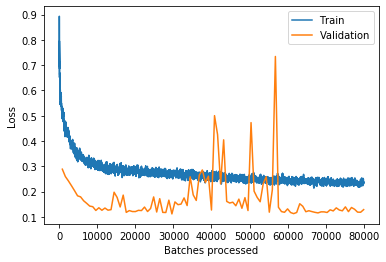

In [6]:
learn.recorder.plot_losses()

In [11]:
learn.save('resnet152_bDA')

In [12]:
torch.cuda.empty_cache()

### ResNet152, DA domyślna

In [13]:
tfms = get_transforms()

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

classes = ['1', '2']

learn = cnn_learner(data, models.resnet152, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [14]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.533002,0.285450,0.880750,04:32
1,0.488534,0.266669,0.895250,04:32
2,0.445697,0.234300,0.913500,04:31
3,0.418785,0.219205,0.925250,04:32
4,0.390413,0.201267,0.929250,04:32
5,0.374304,0.183845,0.935250,04:37
6,0.352251,0.163662,0.946250,04:33
7,0.351721,0.151455,0.953000,04:32
8,0.343578,0.142581,0.955250,04:33
9,0.320661,0.133892,0.955500,04:31


In [15]:
learn.validate(learn.data.valid_dl)

[0.17379534, tensor(0.9682)]

In [16]:
learn.validate(learn.data.train_dl)

[0.055815987, tensor(0.9904)]

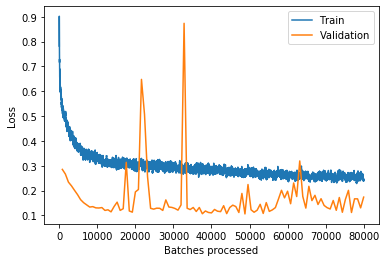

In [17]:
learn.recorder.plot_losses()

In [22]:
learn.save('resnet152_dDA')

In [23]:
torch.cuda.empty_cache()

### ResNet101, bez DA

In [24]:
classes = ['1', '2']

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

learn = cnn_learner(data, models.resnet101, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [25]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.519893,0.301070,0.884250,03:21
1,0.456962,0.306843,0.895000,03:21
2,0.425133,0.260470,0.907750,03:23
3,0.397908,0.228659,0.919000,03:23
4,0.387291,0.360683,0.918000,03:22
5,0.350785,0.382260,0.929750,03:23
6,0.338992,0.225505,0.935750,03:23
7,0.323669,0.203892,0.941500,03:24
8,0.327975,0.184495,0.947000,03:22
9,0.302604,0.158908,0.955250,03:22


In [26]:
learn.validate(learn.data.valid_dl)

[0.1421131, tensor(0.9665)]

In [27]:
learn.validate(learn.data.train_dl)

[0.034705322, tensor(0.9991)]

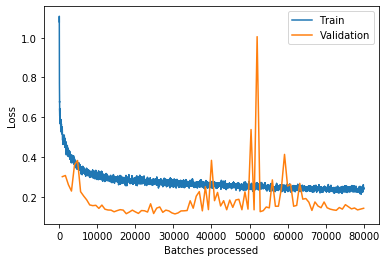

In [28]:
learn.recorder.plot_losses()

In [33]:
learn.save('resnet101_bDA')

In [34]:
torch.cuda.empty_cache()

### ResNet101, DA domyślna

In [4]:
tfms = get_transforms()

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

classes = ['1', '2']

learn = cnn_learner(data, models.resnet101, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [5]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.527154,0.318339,0.878750,06:13
1,0.494341,0.257370,0.903500,03:25
2,0.450000,0.245065,0.907500,03:26
3,0.407091,0.234244,0.915250,03:29
4,0.407844,0.215158,0.930750,03:28
5,0.383896,0.184639,0.938750,03:50
6,0.368288,0.206181,0.944250,04:03
7,0.361205,0.182216,0.944500,03:53
8,0.372187,0.172834,0.950500,03:33
9,0.342594,0.147265,0.954250,03:34


In [6]:
learn.validate(learn.data.valid_dl)

[0.11839916, tensor(0.9695)]

In [7]:
learn.validate(learn.data.train_dl)

[0.05487327, tensor(0.9881)]

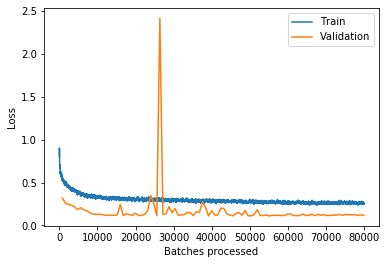

In [8]:
learn.recorder.plot_losses()

In [14]:
learn.save('resnet101_dDA')

In [15]:
torch.cuda.empty_cache()

### ResNet50, bez DA

In [16]:
classes = ['1', '2']

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [17]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.513418,0.301678,0.881250,02:17
1,0.441935,0.275258,0.890500,02:10
2,0.432230,0.261268,0.899500,02:10
3,0.415995,0.246806,0.911250,02:10
4,0.387939,0.231837,0.921750,02:10
5,0.389823,0.218974,0.926000,02:11
6,0.358981,0.203813,0.931250,02:12
7,0.368449,0.192733,0.934750,02:14
8,0.358673,0.176687,0.941250,02:12
9,0.346558,0.175039,0.943750,02:13


In [18]:
learn.validate(learn.data.valid_dl)

[0.1275356, tensor(0.9688)]

In [19]:
learn.validate(learn.data.train_dl)

[0.021910403, tensor(0.9998)]

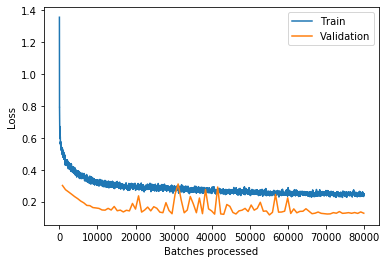

In [20]:
learn.recorder.plot_losses()

In [25]:
learn.save('resnet50_bDA')

In [26]:
torch.cuda.empty_cache()

### ResNet50, DA domyślna

In [27]:
tfms = get_transforms()

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

classes = ['1', '2']

learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [28]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.532741,0.304463,0.877000,02:38
1,0.497849,0.275943,0.893000,02:40
2,0.474392,0.261396,0.899750,02:39
3,0.449177,0.266242,0.901000,02:40
4,0.437839,0.237481,0.914000,02:40
5,0.412365,0.216353,0.928500,02:40
6,0.403892,0.207489,0.931250,02:39
7,0.380316,0.193843,0.931500,02:40
8,0.368776,0.178911,0.939500,02:39
9,0.370722,0.168021,0.944250,02:42


In [29]:
learn.validate(learn.data.valid_dl)

[0.115580484, tensor(0.9685)]

In [30]:
learn.validate(learn.data.train_dl)

[0.067502946, tensor(0.9832)]

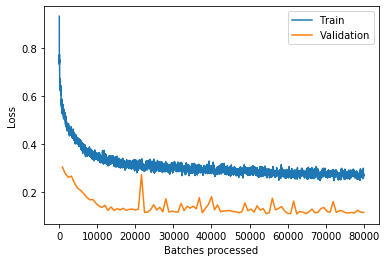

In [31]:
learn.recorder.plot_losses()

In [36]:
learn.save('resnet50_dDA')

In [37]:
torch.cuda.empty_cache()

### vgg19_bn, bez DA

In [38]:
classes = ['1', '2']

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

learn = cnn_learner(data, models.vgg19_bn, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [39]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.524066,0.312049,0.877250,03:51
1,0.486397,0.295420,0.893250,03:50
2,0.438642,0.280020,0.901750,03:51
3,0.427499,0.266167,0.902000,03:51
4,0.432467,0.256564,0.914750,03:52
5,0.401170,0.241443,0.915000,03:52
6,0.393889,0.231493,0.921000,03:51
7,0.384060,0.213371,0.926250,03:53
8,0.388656,0.212385,0.932750,03:52
9,0.350602,0.197299,0.932250,03:53


In [40]:
learn.validate(learn.data.valid_dl)

[0.124613695, tensor(0.9643)]

In [41]:
learn.validate(learn.data.valid_dl)

[0.124613695, tensor(0.9643)]

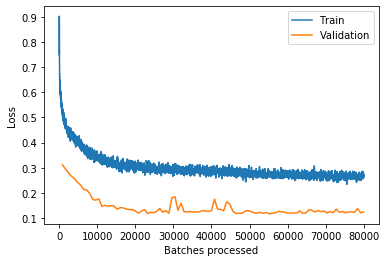

In [42]:
learn.recorder.plot_losses()

In [ ]:
interp.plot_confusion_matrix(figsize=(15,10), dpi = 150)

In [47]:
learn.save('vgg19_bDA')

In [48]:
torch.cuda.empty_cache()

### vgg19_bn, DA domyślna

In [2]:
tfms = get_transforms()

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

classes = ['1', '2']

learn = cnn_learner(data, models.vgg19_bn, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [3]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.556341,0.331851,0.859750,06:42
1,0.499081,0.304557,0.880750,03:56
2,0.470017,0.294335,0.888250,03:58
3,0.451184,0.292848,0.884250,04:01
4,0.464302,0.265036,0.904000,04:06
5,0.445124,0.250459,0.911250,04:04
6,0.437842,0.231845,0.922000,04:04
7,0.423531,0.224292,0.925750,04:05
8,0.392909,0.208972,0.923500,04:06
9,0.378044,0.186757,0.935000,04:06


In [4]:
learn.validate(learn.data.valid_dl)

[0.12248178, tensor(0.9665)]

In [5]:
learn.validate(learn.data.valid_dl)

[0.12248178, tensor(0.9665)]

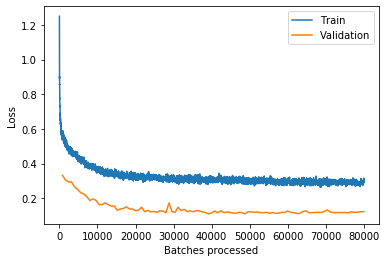

In [6]:
learn.recorder.plot_losses()

In [7]:
learn.save('vgg19_dDA')

In [8]:
torch.cuda.empty_cache()

### vgg16_bn, bez DA

In [9]:
classes = ['1', '2']

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [10]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.528782,0.312414,0.875250,03:21
1,0.461391,0.282608,0.897500,03:22
2,0.440114,0.263226,0.910250,03:21
3,0.414855,0.248907,0.912750,03:22
4,0.418447,0.248579,0.914500,03:22
5,0.407413,0.230644,0.919250,03:23
6,0.388285,0.209695,0.932500,03:23
7,0.381544,0.196522,0.933750,03:22
8,0.365625,0.193913,0.939250,03:22
9,0.333862,0.166741,0.943750,03:23


In [11]:
learn.validate(learn.data.valid_dl)

[0.16875692, tensor(0.9640)]

In [12]:
learn.validate(learn.data.valid_dl)

[0.16875692, tensor(0.9640)]

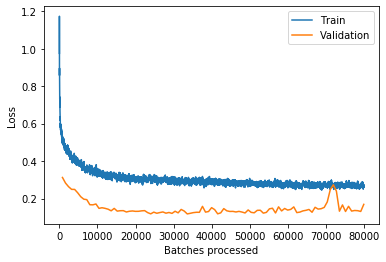

In [13]:
learn.recorder.plot_losses()

In [14]:
learn.save('vgg16_bDA')

In [15]:
torch.cuda.empty_cache()

### vgg16_bn, DA domyślna

In [16]:
tfms = get_transforms()

src = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed=42)
        .label_from_folder())

data = (src.transform(tfms, resize_method=ResizeMethod.CROP, padding_mode='border', size=224)
        .databunch(bs=20, num_workers=0)
        .normalize(imagenet_stats))

classes = ['1', '2']

learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy, model_dir="...").mixup()

print(f'Classes: \n {data.classes}')

Classes: 
 ['1', '2']


In [17]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,0.559906,0.337529,0.862000,03:46
1,0.512659,0.296290,0.887500,03:47
2,0.482588,0.273305,0.904000,03:46
3,0.453504,0.269799,0.905250,03:45
4,0.459355,0.257684,0.913500,03:46
5,0.428719,0.241309,0.915750,03:46
6,0.414462,0.224042,0.925500,03:45
7,0.400026,0.206634,0.930500,03:46
8,0.395275,0.195467,0.936250,03:46
9,0.392069,0.189460,0.937750,03:47


In [18]:
learn.validate(learn.data.valid_dl)

[0.121847965, tensor(0.9668)]

In [19]:
learn.validate(learn.data.valid_dl)

[0.121847965, tensor(0.9668)]

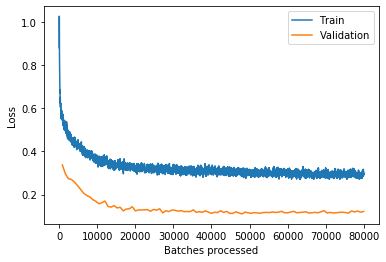

In [20]:
learn.recorder.plot_losses()

In [21]:
learn.save('vgg16_dDA')

In [22]:
torch.cuda.empty_cache()